## Purpose of this notebook
In this notebook we will merge the 3 intermediate tables, delete rows and columns with majority missing entries and prepare the data for EDA.

In [1]:
import pandas as pd
import numpy as np
adm_serv_cpt_df = pd.read_csv('../../data/intermediate/inter022920b.csv')
lab_df = pd.read_csv('../../data/intermediate/inter022020b.csv')
diag_df = pd.read_csv('../../data/intermediate/inter022120.csv')
print(adm_serv_cpt_df.values.shape)
print(lab_df.values.shape)
print(diag_df.values.shape)

(38211, 61)
(53791, 1039)
(58890, 205)


In [2]:
print("After merging we should have 38211 rows and ", 61+1039+205-2, " columns.") # -2 is for index column

After merging we should have 38211 rows and  1303  columns.


In [3]:
combined_df = adm_serv_cpt_df.merge(lab_df, left_on='HADM_ID', right_on='HADM_ID', how='left')
combined_df = combined_df.merge(diag_df, left_on='HADM_ID', right_on='HADM_ID', how='left')
assert combined_df.values.shape == (38211, 1303), "something doesn't add up"

Text(0.5, 1.0, 'Dataframe missing values survey')

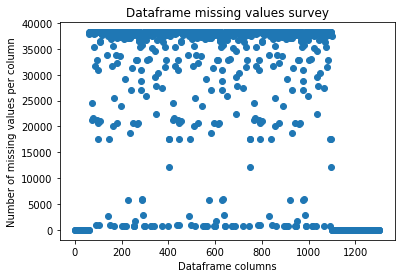

In [4]:
import matplotlib.pyplot as plt
# next we need to quantify the number of missing values for each column
missing_val_array = combined_df.isnull().sum()
num_cols = len(combined_df.columns.tolist())
plt.scatter(range(num_cols), missing_val_array)
plt.xlabel("Dataframe columns")
plt.ylabel("Number of missing values per column")
plt.title("Dataframe missing values survey")

In [5]:
# let's set a threshold at 20%, i.e. we will impute 1/5th of the values, this is certainly one of the 
# parameters to alter. Drop any columns that are missing > 1/5 of values
list_of_cols = combined_df.columns.tolist()
cols_to_drop = [column for column in list_of_cols if missing_val_array[list_of_cols.index(column)]>len(combined_df)/5]
combined_df.drop(columns=cols_to_drop, inplace=True)
print("The size of the remaining dataframe is ", combined_df.values.shape)

The size of the remaining dataframe is  (38211, 334)


In [6]:
# impute the rest of the valeus with the median value
combined_df = combined_df.fillna(combined_df.median())

# lets inspect the columns
combined_df.columns.tolist()

['Unnamed: 0_x',
 'HADM_ID',
 'OUTPUT_LABEL',
 '1Y_PRIOR_ADM',
 'LENGTH_OF_STAY_DAYS',
 'AGE',
 'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
 'ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI',
 'ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM',
 'ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR',
 'DISCHARGE_LOCATION_DISC-TRAN CANCER/CHLDRN H',
 'DISCHARGE_LOCATION_DISCH-TRAN TO PSYCH HOSP',
 'DISCHARGE_LOCATION_HOME',
 'DISCHARGE_LOCATION_HOME HEALTH CARE',
 'DISCHARGE_LOCATION_HOSPICE-HOME',
 'DISCHARGE_LOCATION_LEFT AGAINST MEDICAL ADVI',
 'DISCHARGE_LOCATION_LONG TERM CARE HOSPITAL',
 'DISCHARGE_LOCATION_REHAB/DISTINCT PART HOSP',
 'DISCHARGE_LOCATION_SHORT TERM HOSPITAL',
 'DISCHARGE_LOCATION_SNF',
 'ETHNICITY_BLACK',
 'ETHNICITY_HISPANIC',
 'ETHNICITY_OTHER',
 'ETHNICITY_WHITE',
 'GENDER_M',
 'CURR_SERVICE_CMED',
 'CURR_SERVICE_CSURG',
 'CURR_SERVICE_MED',
 'CURR_SERVICE_NMED',
 'CURR_SERVICE_NSURG',
 'CURR_SERVICE_OMED',
 'CURR_SERVICE_ORTHO',
 'CURR_SERVICE_SURG',
 'CURR_SERVICE_TRAUM',
 '

In [7]:
# looks like some index columns have been preserved, delete the columns starting with "unnamed"
cols_to_drop = [column for column in combined_df.columns.tolist() if column.startswith('Unnamed')]
cols_to_drop

['Unnamed: 0_x', 'Unnamed: 0_y']

In [9]:
# 'DESCRIPTION' - the concatenated diagnosis description should also be droped
cols_to_drop.append('DESCRIPTION')
combined_df.drop(columns=cols_to_drop, inplace=True)
combined_df.values.shape

(38211, 331)

In [10]:
combined_df.to_csv('../../data/processed/processed_for_eda_022920.csv')